### Ixom Potash Simulation

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading).

In [525]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
from MCForecastProduct import MCSimulation
from pathlib import Path

# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [526]:
# load csv data
potash_raw1 = pd.read_csv(
    Path("Resources/potash_price.csv"),
    parse_dates=['Date'], 
    infer_datetime_format=True
)

potash_raw1['time'] = pd.to_datetime(potash_raw1['Date'])


potash_raw1['Dates'] = potash_raw1['time'].dt.date

potash_raw1 = potash_raw1.drop(columns=['time', 'Date'])
potash_raw1 = potash_raw1.set_index("Dates")

In [527]:
potash_raw1

,"Potash Granular MOP bulk cfr Brazil\nLow, USD/t","Potash Granular MOP bulk cfr Brazil\nHigh, USD/t","Potash Granular MOP bulk cfr Brazil\nMidpoint, USD/t","Potash Granular MOP bulk cfr northwest Europe\nLow, Euro/t","Potash Granular MOP bulk cfr northwest Europe\nHigh, Euro/t","Potash Granular MOP bulk cfr northwest Europe\nMid, Euro/t","Potash Standard MOP bulk fob Vancouver\nLow, USD/t","Potash Standard MOP bulk fob Vancouver\nHigh, USD/t","Potash Standard MOP bulk fob Vancouver\nMid, USD/t","Potash Standard MOP bulk cfr southeast Asia\nLow, Euro/t","Potash Standard MOP bulk cfr southeast Asia\nHigh, Euro/t","Potash Standard MOP bulk cfr southeast Asia\nMid, Euro/t"
Dates,,,,,,,,,,,,
2016-05-19,220,230,225,250.0,260,255.0,197.0,242,219.5,230.0,265.0,247.5
2016-05-26,220,230,225,245.0,255,250.0,197.0,242,219.5,230.0,265.0,247.5
2016-06-02,220,225,222.5,245.0,255,250.0,197.0,242,219.5,230.0,265.0,247.5
2016-06-09,215,225,220,245.0,255,250.0,190.0,241,215.5,225.0,265.0,245.0
2016-06-16,210,225,217.5,245.0,255,250.0,184.0,243,213.5,220.0,265.0,242.5
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
# select columns which matter (vancouver index for potash)
potash_columns = potash_raw1.columns.tolist()[6:9]
potash_columns

['Potash Standard MOP bulk fob Vancouver\nLow, USD/t',
 'Potash Standard MOP bulk fob Vancouver\nHigh, USD/t',
 'Potash Standard MOP bulk fob Vancouver\nMid, USD/t']

In [529]:
# Extracting columns 

potash_raw2 = potash_raw1.loc[:,potash_columns]
potash_raw2.head()

,"Potash Standard MOP bulk fob Vancouver\nLow, USD/t","Potash Standard MOP bulk fob Vancouver\nHigh, USD/t","Potash Standard MOP bulk fob Vancouver\nMid, USD/t"
Dates,,,
2016-05-19,197.0,242,219.5
2016-05-26,197.0,242,219.5
2016-06-02,197.0,242,219.5
2016-06-09,190.0,241,215.5
2016-06-16,184.0,243,213.5


In [530]:
potash_raw2 = potash_raw2.drop_duplicates()
potash_raw2

,"Potash Standard MOP bulk fob Vancouver\nLow, USD/t","Potash Standard MOP bulk fob Vancouver\nHigh, USD/t","Potash Standard MOP bulk fob Vancouver\nMid, USD/t"
Dates,,,
2016-05-19,197.0,242,219.5
2016-06-09,190.0,241,215.5
2016-06-16,184.0,243,213.5
2016-07-21,191.0,243,217.0
2016-09-08,197.0,229,213.0
...,...,...,...
2022-03-24,536.0,961,748.5
2022-03-31,630.0,"1,074",852.0
2022-04-07,640.0,"1,087",863.5


In [531]:
#renaming column headings
potash_raw3 = potash_raw2.rename(columns={potash_columns[0]: 'Low', 
                                            potash_columns[1]: 'High', 
                                            potash_columns[2]: 'Mid'},) 
#adds dataframe keys to heading                
potash_df = pd.concat([potash_raw3, ], keys=['Potash'], axis=1, join='inner')

potash_df = potash_df.dropna()

potash_df.tail()

Potash              
              Low   High    Mid
Dates                          
2022-03-17  537.0    912  724.5
2022-03-24  536.0    961  748.5
2022-03-31  630.0  1,074  852.0
2022-04-07  640.0  1,087  863.5
2022-04-14  651.0  1,100  875.5

### Run the Monte Carlo Simulation

In [532]:
# Set number of simulations (assume days as weeks as we have weekly data)
num_sims = 1000
trading_weeks = 12

# Configure a Monte Carlo simulation to forecast 3months daily increments
MC_potash = MCSimulation(
    portfolio_data = potash_df,
    num_simulation = num_sims,
    num_trading_days = trading_weeks
)

In [533]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_potash.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


D:\product_predictions\MCForecastProduct.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994969,1.008922,1.010334,1.016374,0.995608,0.979737,1.026245,1.002905,1.018501,1.000563,...,0.937740,1.012580,1.043970,1.014797,1.025739,1.010470,1.005387,1.024316,0.979870,0.994305
2,1.059474,0.999316,1.015499,0.992301,0.985052,0.983383,1.063332,1.047969,1.006030,0.985696,...,0.898292,1.037847,1.051479,0.991021,1.016178,0.999946,0.998725,1.088828,1.010386,1.020030
3,1.058643,1.005694,0.999633,1.000974,0.977880,0.976168,1.095005,1.060781,1.017963,0.974607,...,0.886092,1.045849,1.025136,0.951636,1.064775,1.009339,1.013879,1.105645,1.045000,1.026546
4,1.071386,1.009805,0.977463,0.996315,1.008886,1.007414,1.124408,1.077264,0.974342,1.022489,...,0.883000,1.059878,1.044973,0.970792,1.104355,0.993320,1.054988,1.085738,1.067491,1.070802
5,1.114827,1.040810,0.936571,1.085370,1.015932,0.982651,1.108236,1.089301,1.012272,1.067092,...,0.865555,1.132024,1.074854,0.972345,1.129699,0.998941,1.040131,1.119842,1.022722,1.069785
6,1.127959,1.042864,0.952881,1.112585,1.030288,1.030163,1.131966,1.039878,1.014112,1.062558,...,0.886929,1.154624,1.085383,0.991528,1.128310,0.984589,1.028832,1.133346,1.003306,1.114431
7,1.157893,1.052090,0.910168,1.131837,1.040192,1.002953,1.176121,1.059870,1.025064,1.044713,...,0.884175,1.191825,1.090698,1.060448,1.136183,0.974889,1.038556,1.179261,1.033482,1.064732
8,1.161365,1.090368,0.916938,1.145416,1.057296,1.017380,1.101622,1.026163,1.052982,1.091799,...,0.910956,1.242632,1.074933,1.045196,1.162816,1.016809,1.035675,1.152681,1.000259,1.093129
9,1.198757,1.099260,0.935635,1.135304,1.106177,1.040552,1.094320,1.067385,1.072735,1.101325,...,0.884750,1.246123,1.115487,1.082625,1.224007,1.063214,1.012351,1.121713,1.016305,1.119864


### Plot the Simulated Outcomes for the Next Year (90 Trading Days)

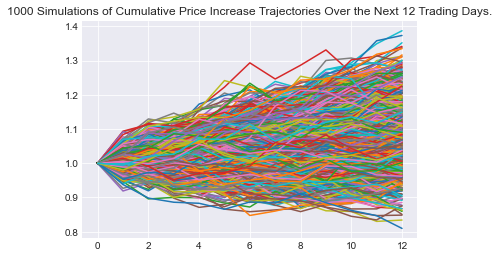

In [534]:
# Plot simulation outcomes
line_plot = MC_potash.plot_simulation()

In [535]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_potash.simulated_return.mean(axis=1)),
    "median": list(MC_potash.simulated_return.median(axis=1)),
    "min": list(MC_potash.simulated_return.min(axis=1)),
    "max": list(MC_potash.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.006856,1.007065,0.918899,1.093639
2,1.014503,1.014281,0.895827,1.129307
3,1.019744,1.020097,0.886092,1.146328
4,1.026265,1.027160,0.871089,1.172718


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of Potash price over next 12 days'}>

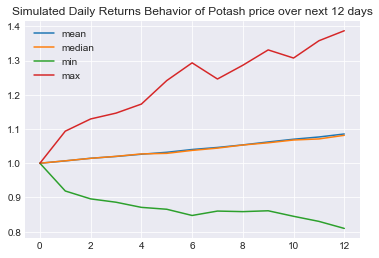

In [536]:
# Use the `plot` function to visually analyze the trajectory of potash price increase on a 90 trading day simulation
df_simulated_returns.plot(title = f"Simulated Daily Returns Behavior of Potash price over next {trading_days} days")

### Calculate the Simulated Price Inc/Losses of Potash Over the Next `252` Trading Days

In [537]:
# Set initial investment
initial_investment = 1

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.006856,1.007065,0.918899,1.093639
2,1.014503,1.014281,0.895827,1.129307
3,1.019744,1.020097,0.886092,1.146328
4,1.026265,1.027160,0.871089,1.172718


### Range of the possible outcomes of Potash Prices

In [538]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_potash.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               1.085415
std                0.092052
min                0.809596
25%                1.023677
50%                1.081501
75%                1.142800
max                1.386938
95% CI Lower       0.910173
95% CI Upper       1.271620
Name: 12, dtype: float64


In [539]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of potash price increments
ci_lower = round(tbl[8]*1,2)
ci_upper = round(tbl[9]*1,2)
latest_date = potash_df.index[-1]




In [540]:
low_price = potash_df.loc[latest_date][0]
high_price = potash_df.loc[latest_date][1]
mid_price = potash_df.loc[latest_date][2]

print(f"Latest Pricing Updates (as of {latest_date})")
print(f" High: {high_price}")
print(f" Mid: {mid_price}")
print(f" Low: {low_price}")


Latest Pricing Updates (as of 2022-04-14)
 High: 1,100
 Mid: 875.5
 Low: 651.0


In [555]:
# Print results
print(f" There is a 95% chance that potash prices"
      f" over the next {trading_days} weeks from {latest_date}\n will fluctuate within the range of"
      f" {ci_lower*100}% and {ci_upper*100}%")

#extracting prices(in str form), removing , 
high_price = ''.join (str (high_price).split (','))
mid_price = ''.join (str (mid_price).split (','))
low_price = ''.join (str (low_price).split (','))



#converts them to float and state results based on lower to upper range 
print(f"\n {ci_lower*100}% range:")

print(f" High: {round(float(high_price)*ci_lower,2)}")
print(f" Mid: {round(float(mid_price)*ci_lower,2)}")
print(f" Low: {round(float(low_price)*ci_lower,2)}")


print(f"\n {ci_upper*100}% range:")

print(f" High: {round(float(high_price)*ci_upper,2)}")
print(f" Mid: {round(float(mid_price)*ci_upper,2)}")
print(f" Low: {round(float(low_price)*ci_upper,2)}")

 There is a 95% chance that potash prices over the next 12 weeks from 2022-04-14
 will fluctuate within the range of 91.0% and 127.0%

 91.0% range:
 High: 1001.0
 Mid: 796.7
 Low: 592.41

 127.0% range:
 High: 1397.0
 Mid: 1111.88
 Low: 826.77
